# 2021J TMA02 Question 3 (20 marks)

* **Name**: Mihaly Zsigo
* **PI**: F2679875

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn import metrics

Analysis of the sample being investigated.

In [2]:
sample_properties = np.array([1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24]).reshape(1,-1)

Extract the column names from a data file.

In [3]:
with open('glass_testing.csv') as f:
    column_names = [n.strip('"') for n in f.readline().strip().split(',')[:-1]]
column_names

['Refractive index',
 'Sodium Na',
 'Magnesium Mg',
 'Aluminium Al',
 'Silicon Si',
 'Potassium K',
 'Calcium Ca',
 'Barium Ba',
 'Iron Fe']

# Part a (5 marks)

Load the training and testing data into numpy arrays. 

The training data is in the file `glass_training.csv` and the testing data is in the file `glass_testing.csv`. Both files have identical structure. The first row of the file contains the column names. Each subsequent row represents one sample of glass, with one type of feature per column. The final column is the correct classification for the samples in the data file.

There is no missing data in either file.

You should load the data into a total of _four_ numpy arrays, named `X_train`, `y_train`, `X_test`, and `y_test`. The `X_` arrays should contain the features for each sample and the `y_` arrays should contain the classifications. 

When you have loaded the data into the arrays, show the shape of each array. 

In [4]:
# Load data from glass_training.csv
X_train = np.genfromtxt('glass_training.csv', skip_header = 1, delimiter = ',', usecols=range(0,9), dtype = 'float32')
y_train = np.genfromtxt('glass_training.csv', skip_header = 1, delimiter = ',', usecols=-1, dtype = 'int')

# Load data from glass_testing.csv
X_test = np.genfromtxt('glass_testing.csv', skip_header = 1, delimiter = ',', usecols=range(0,9), dtype = 'float32')
y_test = np.genfromtxt('glass_testing.csv', skip_header = 1, delimiter = ',', usecols=-1, dtype = 'int')


In [5]:
# The shape of the training arrays
X_train.shape, y_train.shape

((169, 9), (169,))

In [6]:
# The shape of the testing arrays
X_test.shape, y_test.shape

((45, 9), (45,))

# Part b (8 marks)

Create a decision tree classifier and fit it to the training data. The tree should use the "entropy" criterion when deciding on how to fit the tree to the data.

Evaluate the tree on both the training and test data.

Display the tree's depth and number of leaves. Give a graphical representation of the tree.

In [7]:
# Create a decision tree classifier using the "entropy" criterion, and fit it to the training data
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
# Accuracy on training data
print("The tree's accuracy on the training data is:", model.score(X_train, y_train))

The tree's accuracy on the training data is: 1.0


In [9]:
# Accuracy on test data
print("The tree's accuracy on the testing data is:", model.score(X_test, y_test))

The tree's accuracy on the testing data is: 0.7555555555555555


In [10]:
# Predict the classifications from the test data and report on some metrics of the predictions
y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        15
           2       0.78      0.74      0.76        19
           3       0.33      0.33      0.33         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         3

    accuracy                           0.76        45
   macro avg       0.74      0.77      0.75        45
weighted avg       0.76      0.76      0.75        45



In [11]:
# Tree's depth
print("The depth of the decision tree is", model.get_depth())

The depth of the decision tree is 9


In [12]:
# The number of leaves
print("The number of leaves are", model.get_n_leaves())

The number of leaves are 38


The graphical representation of the tree


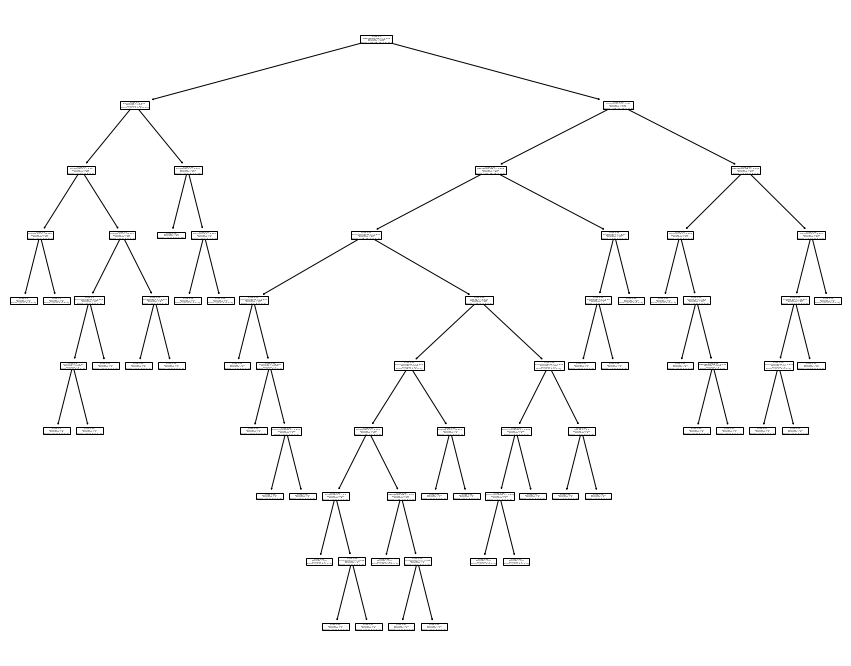

In [13]:
# Graphical representation of the tree
print("The graphical representation of the tree")
plt.figure(figsize=(15, 12))
tree.plot_tree(model,
              feature_names=column_names,
              node_ids=True,
              );

# Part c (4 marks)

Decision trees that perform perfectly on the training data can be overfitted. You should investigate if limiting the depth of the decision tree has an effect on its performance on the test data. Find the smallest depth of decision tree that can be used while still maintaining an accuracy of at least 90% on the training data. You should then evaluate this decision tree on the test data and compare it with the decision tree you created in part (b) above.

Your exploration should use a systematic approach to identify the correct depth of the tree.

In [14]:
# Find the smallest depth to maintain an accuracy of at least 90% on the training data
n=9
while True:
    model1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=n)
    model1.fit(X_train, y_train)
    if model1.score(X_train, y_train) < 0.9:
        n += 1
        break
    else:
        print("With depth of:", n, "the decision tree has accuracy of:", model1.score(X_train, y_train))
        n -= 1

print("\nThe smallest depth to maintain an accuracy of at least 90% on the training data is", n)

With depth of: 9 the decision tree has accuracy of: 1.0
With depth of: 8 the decision tree has accuracy of: 0.9822485207100592
With depth of: 7 the decision tree has accuracy of: 0.9763313609467456
With depth of: 6 the decision tree has accuracy of: 0.9349112426035503

The smallest depth to maintain an accuracy of at least 90% on the training data is 6


In [15]:
# Display the accuracy of the two models
model1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=n)
model1.fit(X_train, y_train)
print("The accuracy of the original model on the testing data is:", str(round(model.score(X_test, y_test),2)))
print("The accuracy of the new model on the testing data is:", str(round(model1.score(X_test, y_test),2)))

The accuracy of the original model on the testing data is: 0.76
The accuracy of the new model on the testing data is: 0.71


In [16]:
# Calculate the performance difference between the two decision trees
result = str(round(100-(model1.score(X_test, y_test)/model.score(X_test, y_test)*100),2))
print("The new, smaller model is", result,"% less effective on the testing data, than the original model.")

The new, smaller model is 5.88 % less effective on the testing data, than the original model.


# Part d (3 marks)

Use both the full-depth decision tree and the depth-limited decision tree to predict the type of glass from the collected sample (stored in `sample_properties`).

Do these two decision trees agree on the type of glass?

Recommend whether either decision tree is suitable to use in a police investigation.

In [17]:
# Use the original model to predict the glass type of the sample_properties
y_pred1 = model.predict(sample_properties)
print("The original model's prediction of the data held in sample_properties is type", y_pred1)

# Use the smaller model to predict the glass type of the sample_properties
y_pred2 = model1.predict(sample_properties)
print("The smaller model's prediction of the data held in sample_properties is type", y_pred2)

The original model's prediction of the data held in sample_properties is type [3]
The smaller model's prediction of the data held in sample_properties is type [1]


### The two decision trees return different predictions of the data held in the sample_properties array.

### None of the two decision trees are accurate enough to be fully relied on during a police investigation, but their provided results could help to stir the investigation process to the right direction.